#### Fulfilling a couple more requests

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
with open('../../models/customer_risk_target_thomas.pkl', 'rb') as f:
    model = pickle.load(f)

/home/ec2-user/anaconda3/envs/ml_basic_py37/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [8]:
modeling_df = pd.read_feather('../../artifacts/modeling_df_final_2020-05-14.feather')

(0.0, 0.04)

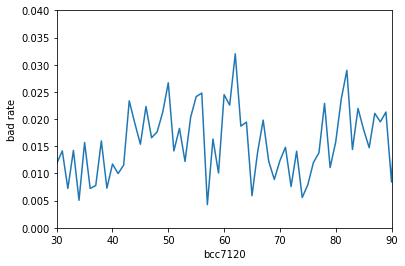

In [9]:
modeling_df.groupby('bcc7120')['target'].mean().plot(kind='line')
plt.xlabel('bcc7120')
plt.ylabel('bad rate')

plt.xlim((30, 90))
plt.ylim((0, 0.04))

(0.0, 0.05)

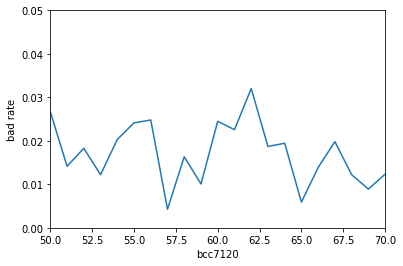

In [179]:
modeling_df.groupby('bcc7120')['target'].mean().plot(kind='line')
plt.xlabel('bcc7120')
plt.ylabel('bad rate')

plt.xlim((50, 70))
plt.ylim((0, 0.05))

(0.0, 0.05)

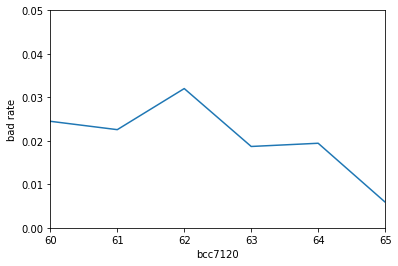

In [180]:
modeling_df.groupby('bcc7120')['target'].mean().plot(kind='line')
plt.xlabel('bcc7120')
plt.ylabel('bad rate')

plt.xlim((60, 65))
plt.ylim((0, 0.05))

In [149]:
corr = modeling_df[features].corr()

In [153]:
corr[corr < 1].max()

first_deposit_amount              0.417496
vantage_score                     0.268495
bcc7120                           0.525469
email_risk_score                  0.410657
fraud_score_2                     0.474368
name_email_correlation            0.093908
transaction_as_pct_of_balance     0.283589
mean_account_balance_30d          0.448374
giact_time_since_last_link        0.351734
phone_risk_score                  0.474368
name_address_correlation          0.190172
all8220                           0.292421
lag_acc_open_first_transaction    0.251008
dollar_val_dd                     0.587857
all7120                           0.525469
sum_deposits_10d                  0.702401
nr_past_transactions              0.538644
total_tradelines_open             0.313696
education_loan_amount             0.438170
address_risk_score                0.410818
iqt9415                           0.636988
max_withdrawals_30d               0.032112
iln5520                           0.438170
max_deposit

target
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: bcc7120, dtype: object

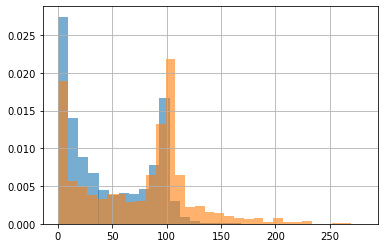

In [4]:
modeling_df[modeling_df['bcc7120'].between(0, 280)].groupby('target')['bcc7120'].hist(bins=30, density=True, alpha=0.6)

target
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: bcc7120, dtype: object

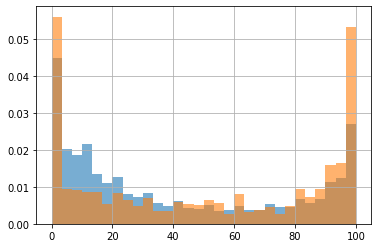

In [5]:
modeling_df[modeling_df['bcc7120'].between(0, 100)].groupby('target')['bcc7120'].hist(bins=30, density=True, alpha=0.6)

target
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: bcc7120, dtype: object

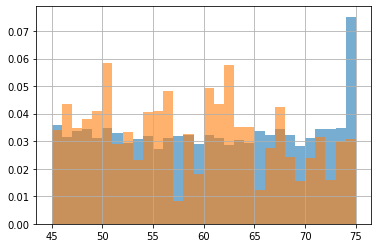

In [8]:
modeling_df[modeling_df['bcc7120'].between(45, 75)].groupby('target')['bcc7120'].hist(bins=30, density=True, alpha=0.6)

In [11]:
from collections import defaultdict

def encode_defaults(df, default_values):
    """Replace default values with NaN, int encode them"""
    default_encoded_cols = []
    for k, (v, encode) in default_values.items():
        cname = k + '_default_encoded'

        if isinstance(v, pd.Interval):
            is_default = ~df[k].between(v.left, v.right) & ~df[k].isna()
        elif isinstance(v, list):
            is_default = df[k].isin(k)
        else:
            raise RuntimeError('Data type {} not supported'.format(str(type(v))))
        
        if ~is_default.isna().all():
            if encode:
                default_encoded_cols.append(cname)
                df.loc[is_default, cname] = is_default * df[k]
            df.loc[is_default, k] = np.nan #set default values to NaN
        
    return df, default_encoded_cols


cols_raw = ['first_deposit_amount', 'vantage_score', 'bcc7120', 'email_risk_score', 
            'fraud_score_2', 'name_email_correlation', 'transaction_as_pct_of_balance', 
            'mean_account_balance_30d', 'giact_time_since_last_link', 'phone_risk_score',
            'name_address_correlation', 'all8220', 'lag_acc_open_first_transaction', 
            'dollar_val_dd', 'all7120', 'sum_deposits_10d', 'nr_past_transactions', 
            'total_tradelines_open', 'education_loan_amount', 'address_risk_score',
            'iqt9415', 'max_withdrawals_30d', 'iln5520', 'max_deposits_30d', 
            'pct_returned_deposits', 'giact_nr_decline', 'nr_direct_deposits', 
            'time_since_last_transaction', 'bal_ratio', 'name_phone_correlation', 
            'giact_nr_other', 'dollar_val_returns', 'nr_trans_ratio', 'iqt9413', 
            'dollar_val_returns_3d', 'nr_returns_30d', 'credit_card_loan_amount',
            'fraud_score_1', 'age_money_account']

cols_raw_ni = ['transaction_code']

cols_encoded = ['transaction_code_encoded', 'all7120_default_encoded', 'bcc7120_default_encoded']

features = cols_raw + cols_encoded

default_values = {
    'vantage_score': [pd.Interval(300, 850), False],
    'all7120': [pd.Interval(0, 990), True],
    'all8220': [pd.Interval(0, 9990), False],
    'bcc7120': [pd.Interval(0, 990), True],
    'iln5520': [pd.Interval(0, 999999990), False],
    'iqt9413': [pd.Interval(0, 90), False]
}

def preprocess(df):
    """
    Code to preprocess model.
    """
    # mapping from transaction code to integer
    tcode_map = defaultdict(int,
                            {'POSDW': 1,
                             'ACHDD': 2,
                             'ACHDWIN': 3,
                             'ACHDDIN': 4,
                             'ACHDW': 5,
                             'ACHINDD': 6,
                             'DDATMREFUND': 7,
                             'DWATM': 8,
                             'DDRAFNEW':9,
                             'DDCK': 10})

    df['transaction_code_encoded'] = df['transaction_code'].map(tcode_map)
    
    # clip to handle infinite values and outliers
    df['transaction_as_pct_of_balance'] = df['transaction_as_pct_of_balance'].clip(-750, 750)
    df['bal_ratio'] = df['bal_ratio'].clip(-750, 750)
    df['pct_returned_deposits'] = df['pct_returned_deposits'].clip(0, 100)

    # fill na here with 0, can't be NaN just indicates lack of data
    df['transaction_as_pct_of_balance'] = df['transaction_as_pct_of_balance'].fillna(0)
    df['max_withdrawals_30d'] = df['max_withdrawals_30d'].fillna(0)
    df['max_deposits_30d'] = df['max_deposits_30d'].fillna(0)
    df['pct_returned_deposits'] = df['pct_returned_deposits'].fillna(0)
    df['bal_ratio'] = df['bal_ratio'].fillna(0)
    df['sum_deposits_10d'] = df['sum_deposits_10d'].fillna(0)
    df['mean_account_balance_30d'] = df['mean_account_balance_30d'].fillna(0)
    df['dollar_val_dd'] = df['dollar_val_dd'].fillna(0) 
    df['nr_direct_deposits'] = df['nr_direct_deposits'].fillna(0)
    df['nr_past_transactions'] = df['nr_past_transactions'].fillna(0)
    df['dollar_val_returns'] = df['dollar_val_returns'].fillna(0)
    df['dollar_val_returns_3d'] = df['dollar_val_returns_3d'].fillna(0)
    df['nr_returns_30d'] = df['nr_returns_30d'].fillna(0)

    # fill na here with -1 indicating that this is the first ever transaction/giact never linked
    df['time_since_last_transaction'] = df['time_since_last_transaction'].fillna(-1)
    df['giact_time_since_last_link'] = df['giact_time_since_last_link'].fillna(-1)
    df['giact_nr_decline'] = df['giact_nr_decline'].fillna(-1)
    df['giact_nr_other'] = df['giact_nr_other'].fillna(-1)
    df['nr_trans_ratio'] = df['nr_trans_ratio'].fillna(-1)
    df['first_deposit_amount'] = df['first_deposit_amount'].fillna(-1)
    df['lag_acc_open_first_transaction'] = df['lag_acc_open_first_transaction'].fillna(-1)
    
    df, _ = encode_defaults(df, default_values)
    
    df['all7120_default_encoded'] = df['all7120_default_encoded'].fillna(-1)
    df['bcc7120_default_encoded'] = df['bcc7120_default_encoded'].fillna(-1)
    
    return df

In [7]:
modeling_df = preprocess(modeling_df)

In [11]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(modeling_df[features])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


(1.0, -0.5)

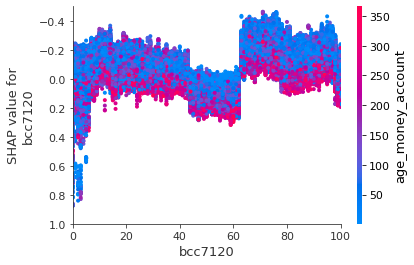

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

shap.dependence_plot("bcc7120", shap_values[1], modeling_df[features], ax=ax, show=False)
ax.set_xlim(left=0, right=100)
ax.set_ylim(1.00, -0.5)

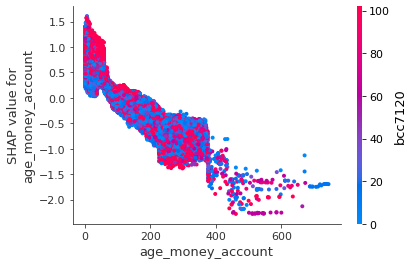

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

shap.dependence_plot("age_money_account", shap_values[1], modeling_df[features], ax=ax, show=False)
# ax.set_xlim(left=0, right=100)
# ax.set_ylim(1.00, -0.5)

In [23]:
modeling_df['pred'] = model.predict_proba(modeling_df[features])[:, 1]

In [27]:
for i in range(54, 65):
    lo = i
    hi = i + 1
    print(f'bcc7120 {lo}-{hi} mean pred: {modeling_df[modeling_df["bcc7120"].between(lo, hi)]["pred"].mean()}')
    

bcc7120 54-55 mean pred: 0.0900209031864873
bcc7120 55-56 mean pred: 0.09244278938234593
bcc7120 56-57 mean pred: 0.09295362861262463
bcc7120 57-58 mean pred: 0.0945631150726462
bcc7120 58-59 mean pred: 0.09055440810606878
bcc7120 59-60 mean pred: 0.09442444398348677
bcc7120 60-61 mean pred: 0.10422182908248959
bcc7120 61-62 mean pred: 0.11416860393917004
bcc7120 62-63 mean pred: 0.10227041331669612
bcc7120 63-64 mean pred: 0.08659894449635105
bcc7120 64-65 mean pred: 0.08222382157497612


#### Check how pred varies as a change bcc7120

In [171]:
x = range(50, 71)
yo = []
yn = []
for x_ in tqdm(x):
    df_copy = df_oot.copy()
    df_copy['credit_card_loan_amount_new'] = df_copy['credit_card_loan_amount'] + ((x_ / 100 - df_copy['bcc7120'] / 100) * (df_copy['credit_card_loan_amount'] / (df_copy['bcc7120'] / 100)))
    df_copy['bcc7120'] = x_
    pred = model.predict_proba(df_copy[features])[:, 1]
    yo.append(scale_scores(pred.mean()))

    df_copy['credit_card_loan_amount'] = df_copy['credit_card_loan_amount_new']
    pred = model.predict_proba(df_copy[features])[:, 1]
    yn.append(scale_scores(pred.mean()))
    gc.collect()

100%|██████████| 21/21 [01:20<00:00,  3.84s/it]


In [172]:
import matplotlib.pyplot as plt

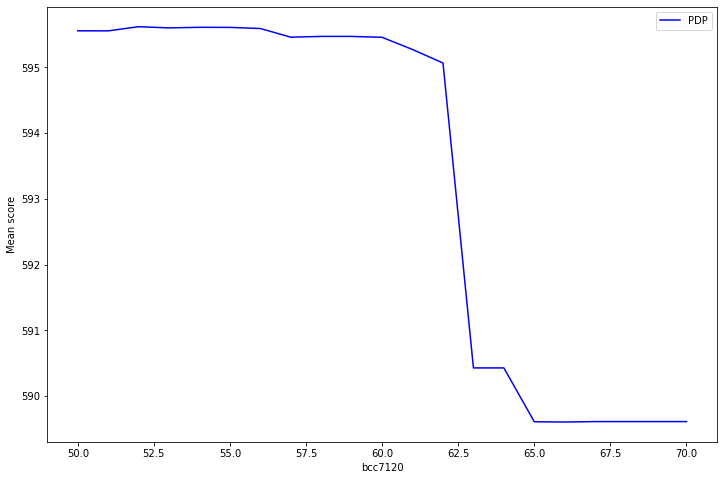

In [174]:
plt.figure(figsize=(12, 8))

plt.xlabel('bcc7120')
plt.ylabel('Mean score')
plt.plot(x, yo, c='blue', label='PDP')
# plt.plot(x, yn, c='orange', label = 'PDP w. adjusted CC loan amt')
plt.legend()

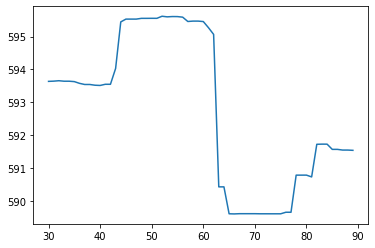

In [136]:
plt.plot(x, y)

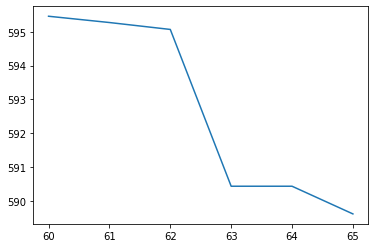

In [140]:
plt.plot(x[30:36], y[30:36])

#### using John's requested transformation

In [145]:
df_oot['bcc7120']

985348     54.0
985349     35.0
985350     23.0
985351      NaN
985352     31.0
           ... 
1171442     NaN
1171443     NaN
1171444     NaN
1171445    98.0
1171446     NaN
Name: bcc7120, Length: 186099, dtype: float64

In [159]:
xo = range(61, 65)
yo = []

xn = range(64, 60, -1)
yn = []
for xo_, xn_ in tqdm(zip(xo, xn)):
    df_copy = df_oot[df_oot['bcc7120'].between(xo_ - 0.1, xo_ + 0.1)].copy()
    
    pred = model.predict_proba(df_copy[features])[:, 1]
    yo.append(scale_scores(pred.mean()))
    
    df_copy['credit_card_loan_amount'] = df_copy['credit_card_loan_amount'] + ((xn_ / 100 - df_copy['bcc7120'] / 100) * (df_copy['credit_card_loan_amount'] / (df_copy['bcc7120'] / 100)))
    df_copy['bcc7120'] = xn_

    pred = model.predict_proba(df_copy[features])[:, 1]
    yn.append(scale_scores(pred.mean()))
    gc.collect()

4it [00:01,  3.44it/s]


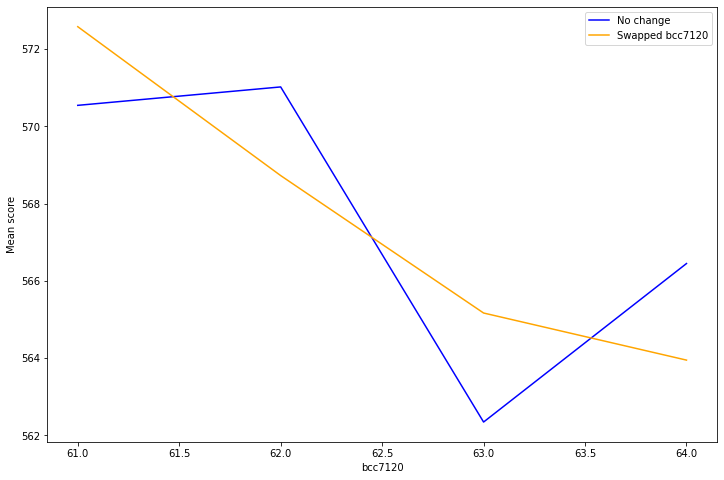

In [166]:
plt.figure(figsize=(12, 8))

plt.xlabel('bcc7120')
plt.ylabel('Mean score')
plt.plot(xo, yo, c='blue', label='No change')
plt.plot(xn, yn, c='orange', label = 'Swapped bcc7120')
plt.legend()

In [122]:
from tqdm import tqdm

def find_bcc7120_splits(tree_info):
    splits = []
    
    def preorder(split, tree_idx):
        """
        preorder tree traversal
        """
        if 'split_feature' in split and split['split_feature'] == 2: # 2 would be bcc7120 in this case
            split['tree_index'] = tree_idx
            splits.append(split)

        if 'left_child' in split:
            preorder(split['left_child'], tree_idx)
            
        if 'right_child' in tree:
            preorder(split['left_child'], tree_idx)
        
    for tree in tqdm(tree_info):
        preorder(tree['tree_structure'], tree['tree_index'])
        
    return splits

In [123]:
bcc7120_splits = find_bcc7120_splits(model_json['tree_info'])

100%|██████████| 1400/1400 [00:00<00:00, 214495.38it/s]


In [124]:
len(bcc7120_splits)

190

In [125]:
bcc7120_split_info = pd.DataFrame({'threshold': [s['threshold'] for s in bcc7120_splits],
                                   'internal_value': [s['internal_value'] for s in bcc7120_splits],
                                   'internal_weight': [s['internal_weight'] for s in bcc7120_splits],
                                   'internal_count': [s['internal_count'] for s in bcc7120_splits],
                                   'tree_index': [s['tree_index'] for s in bcc7120_splits]})

In [128]:
bcc7120_split_info[bcc7120_split_info['threshold'].between(60, 63)].head()

,threshold,internal_value,internal_weight,internal_count,tree_index
42,62.5,-0.008603,29045.3,134178,397
45,62.5,0.006121,28962.8,123209,431
57,62.5,-0.013772,131823.0,841343,537
64,62.5,0.005978,151608.0,968893,594
77,62.5,-0.001498,150135.0,1070164,737


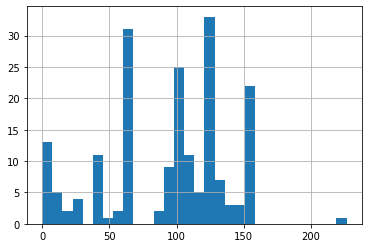

In [113]:
bcc7120_split_info['threshold'].hist(bins=30)

In [129]:
import os

In [130]:
os.makedirs('../artifacts/bcc7120_split_trees')

In [133]:
import pydot
import lightgbm as lgb

def save_tree(model, tree_idx, filename, show_info=['split_gain', 'internal_value', 'internal_count', 'internal_weight', 'leaf_count', 'leaf_weight', 'data_percentage']):
    """
    """
    tree = lgb.create_tree_digraph(model.booster_, tree_index=tree_idx, show_info=show_info)
    tree.save(filename)
    (pd,) = pydot.graph_from_dot_file(filename)
    pd.write_png(filename)


idxs = bcc7120_split_info[bcc7120_split_info['threshold'].between(60, 63)]['tree_index'].values

for idx in tqdm(idxs):
    name = f'tree_{idx}.png'
    save_tree(model, idx, os.path.join('../artifacts/bcc7120_split_trees', name))

100%|██████████| 27/27 [00:35<00:00,  1.32s/it]


In [9]:
from rdsutils.plot import plot_pr_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

def build_table1(modeling_df, percentiles, target_col_name, pred_col_name):
    """ cumulative """
    df = []
    for thresh, pctl in [(np.percentile(modeling_df[pred_col_name], pctl), pctl) for pctl in percentiles]:
        pred = modeling_df[pred_col_name] >= thresh
        rep = classification_report(y_true=modeling_df[target_col_name], y_pred=pred, output_dict=True)
        conf = confusion_matrix(y_true=modeling_df[target_col_name], y_pred=pred)
        tn, fp, fn, tp = conf.ravel()
        df.append([pctl, thresh, fp / (fp + tn) * 100, rep['True']['recall'] * 100,
                  sum(conf[:, 1]), conf[1][1], conf[1][0], conf[0][1], tn])
    return pd.DataFrame(df, columns=['Percentile', 'Threshold', 'False Positive Rate (%)', 
                                     'Fraud Capture Rate (%)', '#Above Threshold', '#Fraudulent Above Threshold', 
                                     '#Fraudulent Below Threshold', '#Good Above Threshold', '#True Negatives'])

In [12]:
def scale_scores(predictions):
    """
    Convert probability to score.
    """
    try:
        assert ((predictions >= 0) & (predictions <= 1)).all(), 'probability must be in range [0,1]'
    except AssertionError:
        raise

    # Formula parameters
    ALPHA = 631.9455383610933
    BETA = 30.812519272450654

    # Minimum and maximum values for validation
    MINIMUM = 300
    MAXIMUM = 850

    score = np.minimum(np.maximum(np.log(predictions / (1 - predictions)) * BETA + ALPHA, MINIMUM), MAXIMUM)
   
    return score

#### oot

In [23]:
df_static = pd.read_feather('../../artifacts/sampled_df_raw_labeled_20200623.feather')
# df_static = pd.read_feather('../../artifacts/replication/sampled_df_raw_labeled.feather')

In [24]:
df_static['age_money_account'] = (df_static['sample_date'] - df_static['date_account_opened']).dt.days

##### 01-06-2020

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
def get_df_oot(df_static, model, date):
    df_oot = df_static[df_static['sample_date'] == pd.to_datetime(date)]
    df_oot = preprocess(df_oot)
    df_oot.loc[:, 'pred_target'] = model.predict_proba(df_oot[features])[:, 1]
    df_oot.loc[:, 'score'] = scale_scores(df_oot['pred_target'])
    return df_oot

In [ ]:
df_oot = get_df_oot(df_static, model, '2020-01-06')

In [29]:
df_oot['indeterminate'].value_counts()

True     99807
False    62181
Name: indeterminate, dtype: int64

In [65]:
print(build_table1(df_oot[(df_oot['nr_transactions_next_90d'] > 0) & (df_oot['nr_past_transactions'] > 0)], np.linspace(0, 99, 100), 'target', 'score').round(2).to_csv(index=False))

Percentile,Threshold,False Positive Rate (%),Fraud Capture Rate (%),#Above Threshold,#Fraudulent Above Threshold,#Fraudulent Below Threshold,#Good Above Threshold,#True Negatives
0.0,316.48,100.0,100.0,64081,1186,0,62895,0
1.0,381.49,98.98,100.0,63440,1186,0,62254,641
2.0,391.69,97.96,99.92,62799,1185,1,61614,1281
3.0,398.39,96.94,99.92,62158,1185,1,60973,1922
4.0,403.32,95.92,99.92,61517,1185,1,60332,2563
5.0,407.69,94.91,99.92,60877,1185,1,59692,3203
6.0,411.18,93.89,99.92,60236,1185,1,59051,3844
7.0,414.47,92.87,99.92,59595,1185,1,58410,4485
8.0,417.43,91.85,99.92,58954,1185,1,57769,5126
9.0,420.29,90.83,99.92,58313,1185,1,57128,5767
10.0,422.92,89.81,99.92,57673,1185,1,56488,6407
11.0,425.34,88.79,99.92,57032,1185,1,55847,7048
12.0,427.71,87.77,99.92,56391,1185,1,55206,7689
13.0,429.8,86.76,99.92,55750,1185,1,54565,8330
14.0,431.92,85.74,99.83,55109,1184,2,53925,8970
15.0,433.89,84.72,99.83,54469,1184,2,53285,9610
16.0,435.75,83.7,99.83,53828,1184,2,52644,10251
17.0,437.67,82.68,99

In [58]:
len(df_oot)

161988

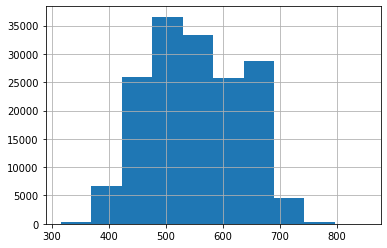

In [27]:
df_oot['score'].hist()

In [28]:
import gc

from sklearn.metrics import roc_auc_score, average_precision_score

def get_metrics(df, score_col):
    dsigma = df[~df['fraud_score_2'].isna()]
    auc = round(roc_auc_score(y_score=dsigma['fraud_score_2'], 
                              y_true=dsigma['target'])*100, 2)
    ap = round(average_precision_score(y_score=dsigma['fraud_score_2'], 
                                       y_true=dsigma['target'])*100, 2)

    print(f'{auc}, {ap}')
    del dsigma
    gc.collect()

    dfico = df[~df['fico_score'].isna()]
    auc = round(roc_auc_score(y_score=850-dfico['fico_score'], 
                              y_true=dfico['target'])*100, 2)
    ap = round(average_precision_score(y_score=850-dfico['fico_score'], 
                                       y_true=dfico['target'])*100, 2)

    print(f'{auc}, {ap}')
    del dfico
    gc.collect()

    auc = round(roc_auc_score(y_score=df[score_col], 
                              y_true=df['target'])*100, 2)
    ap = round(average_precision_score(y_score=df[score_col], 
                                       y_true=df['target'])*100, 2)

    print(f'{auc}, {ap}')

In [29]:
get_metrics(df_oot, 'pred_target')

68.99, 2.45
66.88, 4.5
88.67, 27.95


In [30]:
get_metrics(df_oot, 'score')

68.99, 2.45
66.88, 4.5
88.67, 27.95


In [31]:
get_metrics(df_oot[df_oot['nr_transactions_next_90d'] > 0], 'pred_target')

73.92, 7.22
69.68, 15.25
95.55, 52.74


In [32]:
get_metrics(df_oot[(df_oot['nr_past_transactions'] > 0)], 'pred_target')

70.81, 3.0
71.2, 9.5
94.48, 45.36


In [33]:
get_metrics(df_oot[(df_oot['nr_transactions_next_90d'] > 0) & (df_oot['nr_past_transactions'] > 0)], 'pred_target')

72.19, 4.92
71.73, 14.61
96.16, 62.57


In [34]:
dgd = df_oot[(df_oot['nr_transactions_next_90d'] > 0) & (df_oot['nr_past_transactions'] > 0)]
print(build_table1(dgd, np.linspace(90, 99, 10), 'target', 'score').round(2).to_csv(index=False))

del dgd
gc.collect()

Percentile,Threshold,False Positive Rate (%),Fraud Capture Rate (%),#Above Threshold,#Fraudulent Above Threshold,#Fraudulent Below Threshold,#Good Above Threshold,#True Negatives
90.0,584.23,8.5,89.8,6409,1065,121,5344,57551
91.0,590.41,7.5,88.53,5768,1050,136,4718,58177
92.0,597.16,6.49,87.86,5127,1042,144,4085,58810
93.0,604.92,5.52,85.75,4486,1017,169,3469,59426
94.0,613.24,4.54,83.22,3845,987,199,2858,60037
95.0,622.88,3.58,80.44,3205,954,232,2251,60644
96.0,633.8,2.65,75.8,2564,899,287,1665,61230
97.0,645.27,1.71,71.25,1923,845,341,1078,61817
98.0,662.04,0.91,59.7,1282,708,478,574,62321
99.0,693.58,0.24,41.15,641,488,698,153,62742



0

#### feb

In [66]:
df_oot = get_df_oot(df_static, model, '2020-02-17')

In [67]:
print(build_table1(df_oot[(df_oot['nr_transactions_next_90d'] > 0) & (df_oot['nr_past_transactions'] > 0)], np.linspace(0, 99, 100), 'target', 'score').round(2).to_csv(index=False))

Percentile,Threshold,False Positive Rate (%),Fraud Capture Rate (%),#Above Threshold,#Fraudulent Above Threshold,#Fraudulent Below Threshold,#Good Above Threshold,#True Negatives
0.0,303.99,100.0,100.0,67050,1220,0,65830,0
1.0,376.69,98.98,100.0,66379,1220,0,65159,671
2.0,387.26,97.96,100.0,65709,1220,0,64489,1341
3.0,394.22,96.94,100.0,65038,1220,0,63818,2012
4.0,399.45,95.93,100.0,64368,1220,0,63148,2682
5.0,403.67,94.91,99.92,63697,1219,1,62478,3352
6.0,407.39,93.89,99.84,63027,1218,2,61809,4021
7.0,410.67,92.87,99.84,62356,1218,2,61138,4692
8.0,413.6,91.85,99.84,61686,1218,2,60468,5362
9.0,416.37,90.84,99.84,61015,1218,2,59797,6033
10.0,419.03,89.82,99.84,60345,1218,2,59127,6703
11.0,421.45,88.8,99.84,59674,1218,2,58456,7374
12.0,423.75,87.78,99.84,59004,1218,2,57786,8044
13.0,425.98,86.76,99.75,58333,1217,3,57116,8714
14.0,428.1,85.75,99.75,57663,1217,3,56446,9384
15.0,430.12,84.73,99.51,56992,1214,6,55778,10052
16.0,432.1,83.71,99.51,56322,1214,6,55108,10722
17.0,434.1,82.69,99.5

In [36]:
get_metrics(df_oot, 'pred_target')

68.86, 2.27
65.47, 3.76
86.54, 23.55


In [37]:
get_metrics(df_oot[df_oot['nr_transactions_next_90d'] > 0], 'pred_target')

73.99, 6.7
67.74, 12.17
94.3, 45.63


In [38]:
get_metrics(df_oot[(df_oot['nr_past_transactions'] > 0)], 'pred_target')

72.24, 3.15
69.42, 7.96
93.33, 38.14


In [39]:
get_metrics(df_oot[(df_oot['nr_transactions_next_90d'] > 0) & (df_oot['nr_past_transactions'] > 0)], 'pred_target')

74.01, 5.29
69.85, 12.77
95.46, 56.89


In [40]:
df_oot['score'] = scale_scores(df_oot['pred_target'])
dgd = df_oot[(df_oot['nr_transactions_next_90d'] > 0) & (df_oot['nr_past_transactions'] > 0)]
print(build_table1(dgd, np.linspace(90, 99, 10), 'target', 'score').round(2).to_csv(index=False))

del dgd
gc.collect()

Percentile,Threshold,False Positive Rate (%),Fraud Capture Rate (%),#Above Threshold,#Fraudulent Above Threshold,#Fraudulent Below Threshold,#Good Above Threshold,#True Negatives
90.0,588.47,8.56,87.7,6705,1070,150,5635,60195
91.0,594.45,7.56,86.48,6035,1055,165,4980,60850
92.0,601.21,6.59,84.34,5364,1029,191,4335,61495
93.0,608.66,5.61,82.21,4694,1003,217,3691,62139
94.0,617.11,4.64,79.26,4023,967,253,3056,62774
95.0,626.01,3.68,76.23,3353,930,290,2423,63407
96.0,636.08,2.73,72.38,2682,883,337,1799,64031
97.0,647.7,1.84,65.57,2012,800,420,1212,64618
98.0,662.91,1.0,55.74,1341,680,540,661,65169
99.0,689.16,0.29,39.59,671,483,737,188,65642



22

#### mar

In [68]:
df_oot = get_df_oot(df_static, model, '2020-03-15')

In [69]:
print(build_table1(df_oot[(df_oot['nr_transactions_next_90d'] > 0) & (df_oot['nr_past_transactions'] > 0)], np.linspace(0, 99, 100), 'target', 'score').round(2).to_csv(index=False))

Percentile,Threshold,False Positive Rate (%),Fraud Capture Rate (%),#Above Threshold,#Fraudulent Above Threshold,#Fraudulent Below Threshold,#Good Above Threshold,#True Negatives
0.0,306.7,100.0,100.0,66749,1095,0,65654,0
1.0,375.01,98.98,99.91,66081,1094,1,64987,667
2.0,385.12,97.97,99.82,65414,1093,2,64321,1333
3.0,391.93,96.95,99.73,64746,1092,3,63654,2000
4.0,397.12,95.94,99.73,64079,1092,3,62987,2667
5.0,401.08,94.92,99.73,63411,1092,3,62319,3335
6.0,404.63,93.9,99.73,62744,1092,3,61652,4002
7.0,408.01,92.89,99.73,62076,1092,3,60984,4670
8.0,410.88,91.87,99.63,61409,1091,4,60318,5336
9.0,413.58,90.86,99.63,60741,1091,4,59650,6004
10.0,416.12,89.84,99.54,60074,1090,5,58984,6670
11.0,418.49,88.82,99.54,59406,1090,5,58316,7338
12.0,420.76,87.81,99.54,58739,1090,5,57649,8005
13.0,423.07,86.79,99.54,58071,1090,5,56981,8673
14.0,425.1,85.78,99.45,57404,1089,6,56315,9339
15.0,427.23,84.76,99.45,56736,1089,6,55647,10007
16.0,429.13,83.74,99.36,56069,1088,7,54981,10673
17.0,430.92,82.73,99

In [42]:
get_metrics(df_oot, 'pred_target')

69.07, 2.14
66.06, 3.21
85.12, 19.35


In [43]:
get_metrics(df_oot[df_oot['nr_transactions_next_90d'] > 0], 'pred_target')

73.91, 6.32
68.02, 10.26
93.37, 38.52


In [44]:
get_metrics(df_oot[(df_oot['nr_past_transactions'] > 0)], 'pred_target')

72.24, 2.84
69.12, 6.17
92.08, 31.54


In [45]:
get_metrics(df_oot[(df_oot['nr_transactions_next_90d'] > 0) & (df_oot['nr_past_transactions'] > 0)], 'pred_target')

73.97, 4.91
69.23, 10.19
94.58, 49.86


In [46]:
df_oot['score'] = scale_scores(df_oot['pred_target'])
dgd = df_oot[(df_oot['nr_transactions_next_90d'] > 0) & (df_oot['nr_past_transactions'] > 0)]
print(build_table1(dgd, np.linspace(90, 99, 10), 'target', 'score').round(2).to_csv(index=False))

del dgd
gc.collect()

Percentile,Threshold,False Positive Rate (%),Fraud Capture Rate (%),#Above Threshold,#Fraudulent Above Threshold,#Fraudulent Below Threshold,#Good Above Threshold,#True Negatives
90.0,586.01,8.75,85.21,6675,933,162,5742,59912
91.0,592.36,7.76,83.47,6008,914,181,5094,60560
92.0,599.16,6.78,81.37,5340,891,204,4449,61205
93.0,606.65,5.8,79.18,4673,867,228,3806,61848
94.0,614.06,4.82,76.8,4005,841,254,3164,62490
95.0,622.86,3.87,72.88,3338,798,297,2540,63114
96.0,631.86,2.93,68.04,2670,745,350,1925,63729
97.0,644.17,2.01,62.19,2003,681,414,1322,64332
98.0,658.13,1.14,53.42,1335,585,510,750,64904
99.0,682.78,0.37,38.72,668,424,671,244,65410



22

#### apr

In [70]:
df_oot = get_df_oot(df_static, model, '2020-04-15')

In [71]:
print(build_table1(df_oot[(df_oot['nr_transactions_next_90d'] > 0) & (df_oot['nr_past_transactions'] > 0)], np.linspace(0, 99, 100), 'target', 'score').round(2).to_csv(index=False))

Percentile,Threshold,False Positive Rate (%),Fraud Capture Rate (%),#Above Threshold,#Fraudulent Above Threshold,#Fraudulent Below Threshold,#Good Above Threshold,#True Negatives
0.0,300.0,100.0,100.0,62874,883,0,61991,0
1.0,370.06,98.99,99.89,62245,882,1,61363,628
2.0,380.2,97.97,99.89,61616,882,1,60734,1257
3.0,387.05,96.96,99.89,60987,882,1,60105,1886
4.0,392.32,95.94,99.89,60359,882,1,59477,2514
5.0,396.45,94.93,99.89,59730,882,1,58848,3143
6.0,399.88,93.92,99.89,59101,882,1,58219,3772
7.0,403.21,92.9,99.77,58472,881,2,57591,4400
8.0,405.99,91.89,99.77,57844,881,2,56963,5028
9.0,408.87,90.87,99.77,57215,881,2,56334,5657
10.0,411.38,89.86,99.77,56586,881,2,55705,6286
11.0,413.69,88.85,99.77,55957,881,2,55076,6915
12.0,415.91,87.83,99.77,55329,881,2,54448,7543
13.0,418.03,86.82,99.77,54700,881,2,53819,8172
14.0,420.08,85.8,99.66,54071,880,3,53191,8800
15.0,422.14,84.79,99.66,53443,880,3,52563,9428
16.0,423.9,83.78,99.66,52814,880,3,51934,10057
17.0,425.72,82.76,99.66,52185,880,3,5130

In [48]:
get_metrics(df_oot, 'pred_target')

69.67, 1.86
65.22, 2.4
85.38, 19.22


In [49]:
get_metrics(df_oot[df_oot['nr_transactions_next_90d'] > 0], 'pred_target')

74.19, 5.81
66.91, 7.9
92.96, 34.02


In [50]:
get_metrics(df_oot[(df_oot['nr_past_transactions'] > 0)], 'pred_target')

72.7, 2.38
68.09, 4.46
92.47, 30.5


In [51]:
get_metrics(df_oot[(df_oot['nr_transactions_next_90d'] > 0) & (df_oot['nr_past_transactions'] > 0)], 'pred_target')

74.45, 4.44
68.25, 7.91
95.01, 47.38


#### Some more crap

In [184]:
df_oot = get_df_oot(df_static, model, '2020-01-06')

In [208]:
def build_table_3(modeling_df, percentiles, target_col_name, pred_col_name, fico_col_name):
    """ John's request """
    df = []
    for (fthresh, pctl), (mthresh, pctl) in zip([(np.percentile(modeling_df[fico_col_name], pctl), pctl) for pctl in percentiles], [(np.percentile(modeling_df[pred_col_name], pctl), pctl) for pctl in percentiles][::-1]):
        mbr = modeling_df[modeling_df[pred_col_name] >= mthresh]['target'].mean() * 100
        fbr = modeling_df[modeling_df[fico_col_name] <= fthresh]['target'].mean() * 100

        df.append([pctl, fthresh, mthresh, fbr, mbr])
        
    return pd.DataFrame(df, columns=['Percentile', 'FICO Threshold', 'Model Score Treshold', 'FICO Bad Rate (%)', 'Model Bad Rate (%)'])

In [192]:
dfixed = df_oot[~df_oot['fico_score'].isna()]
dfixed['fico_adjusted'] = dfixed['fico_score'] * np.where(dfixed['fico_score'] > 850, 0, 1)

In [221]:
tbl = build_table_3(dfixed[(dfixed['nr_transactions_next_90d'] > 0) & (dfixed['nr_past_transactions'] > 0)], np.linspace(0, 100, 26), 'target', 'score', 'fico_adjusted')

In [223]:
print(tbl.round(2).to_csv(index=False))

Percentile,FICO Threshold,Model Score Treshold,FICO Bad Rate (%),Model Bad Rate (%)
100.0,0.0,850.0,17.24,100.0
96.0,495.0,638.77,20.83,38.84
92.0,567.0,603.84,16.87,22.57
88.0,594.0,578.89,13.3,15.85
84.0,619.0,560.62,10.91,12.29
80.0,643.0,547.04,9.11,9.94
76.0,664.0,535.81,7.76,8.35
72.0,682.0,526.61,6.74,7.19
68.0,697.0,518.71,5.97,6.3
64.0,710.0,511.47,5.39,5.61
60.0,721.0,505.06,4.9,5.07
56.0,731.0,498.7,4.47,4.63
52.0,740.0,492.99,4.09,4.25
48.0,747.0,487.28,3.83,3.94
44.0,755.0,481.86,3.55,3.66
40.0,762.0,476.6,3.34,3.42
36.0,768.0,471.18,3.16,3.22
32.0,775.0,465.85,2.97,3.04
28.0,781.0,460.29,2.83,2.87
24.0,788.0,454.6,2.68,2.72
20.0,795.0,448.53,2.55,2.59
16.0,802.0,441.9,2.44,2.47
12.0,810.0,434.11,2.34,2.36
8.0,819.0,424.36,2.25,2.26
4.0,831.0,410.11,2.15,2.17
0.0,850.0,316.48,2.08,2.08



In [218]:
def build_table_4(modeling_df, percentiles, target_col_name, pred_col_name, fico_col_name):
    """ John's request """
    df = []
    
    fpctls = [(np.percentile(modeling_df[fico_col_name], pctl), pctl) for pctl in percentiles]
    mpctls = [(np.percentile(modeling_df[pred_col_name], pctl), pctl) for pctl in percentiles][::-1]
    
    for i in range(0, len(fpctls) - 1):
        plo = fpctls[i][-1]
        phi = fpctls[i+1][-1]
        
        mbr = modeling_df[modeling_df[pred_col_name].between(mpctls[i+1][0], mpctls[i][0])]['target'].mean() * 100
        fbr = modeling_df[modeling_df[fico_col_name].between(fpctls[i][0], fpctls[i+1][0])]['target'].mean() * 100

        df.append([f'{plo}-{phi}', fpctls[i][0], mpctls[i+1][0], fbr, mbr])
        
    return pd.DataFrame(df, columns=['Percentile', 'FICO Threshold', 'Model Score Treshold', 'FICO Bad Rate (%)', 'Model Bad Rate (%)'])

In [224]:
tbl = build_table_4(dfixed[(dfixed['nr_transactions_next_90d'] > 0) & (dfixed['nr_past_transactions'] > 0)], np.linspace(0, 100, 26), 'target', 'score', 'fico_adjusted')

In [226]:
print(tbl.round(2).to_csv(index=False))

Percentile,FICO Threshold,Model Score Treshold,FICO Bad Rate (%),Model Bad Rate (%)
0.0-4.0,0.0,638.77,20.83,38.84
4.0-8.0,495.0,603.84,13.19,6.29
8.0-12.0,567.0,578.89,6.31,2.4
12.0-16.0,594.0,560.62,3.73,1.63
16.0-20.0,619.0,547.04,1.78,0.54
20.0-24.0,643.0,535.81,1.19,0.36
24.0-28.0,664.0,526.61,0.92,0.23
28.0-32.0,682.0,518.71,0.52,0.09
32.0-36.0,697.0,511.47,0.57,0.14
36.0-40.0,710.0,505.06,0.42,0.18
40.0-44.0,721.0,498.7,0.28,0.18
44.0-48.0,731.0,492.99,0.12,0.14
48.0-52.0,740.0,487.28,0.43,0.14
52.0-56.0,747.0,481.86,0.19,0.09
56.0-60.0,755.0,476.6,0.34,0.09
60.0-64.0,762.0,471.18,0.04,0.14
64.0-68.0,768.0,465.85,0.22,0.14
68.0-72.0,775.0,460.29,0.3,0.09
72.0-76.0,781.0,454.6,0.07,0.0
76.0-80.0,788.0,448.53,0.16,0.18
80.0-84.0,795.0,441.9,0.16,0.05
84.0-88.0,802.0,434.11,0.25,0.0
88.0-92.0,810.0,424.36,0.12,0.05
92.0-96.0,819.0,410.11,0.12,0.0
96.0-100.0,831.0,316.48,0.13,0.0



In [227]:
df_oot = get_df_oot(df_static, model, '2020-02-17')

In [228]:
dfixed = df_oot[~df_oot['fico_score'].isna()]
dfixed['fico_adjusted'] = dfixed['fico_score'] * np.where(dfixed['fico_score'] > 850, 0, 1)

In [229]:
tbl = build_table_3(dfixed[(dfixed['nr_transactions_next_90d'] > 0) & (dfixed['nr_past_transactions'] > 0)], np.linspace(0, 100, 26), 'target', 'score', 'fico_adjusted')

In [230]:
print(tbl.round(2).to_csv(index=False))

Percentile,FICO Threshold,Model Score Treshold,FICO Bad Rate (%),Model Bad Rate (%)
100.0,0.0,845.78,16.4,100.0
96.0,482.0,641.08,18.3,36.02
92.0,556.0,607.57,16.24,21.29
88.0,585.0,582.89,12.86,15.16
84.0,609.0,564.2,10.8,11.7
80.0,633.0,549.64,9.03,9.58
76.0,656.0,538.08,7.66,8.04
72.0,674.0,528.41,6.7,6.96
68.0,690.0,520.03,5.92,6.12
64.0,705.0,512.48,5.28,5.47
60.0,717.0,505.59,4.79,4.94
56.0,728.0,499.18,4.36,4.52
52.0,737.0,492.7,4.01,4.15
48.0,745.0,486.48,3.72,3.84
44.0,753.0,480.64,3.46,3.57
40.0,760.0,474.99,3.25,3.34
36.0,767.0,469.33,3.05,3.13
32.0,773.0,463.73,2.89,2.96
28.0,780.0,457.82,2.75,2.8
24.0,787.0,451.79,2.62,2.66
20.0,794.0,445.52,2.49,2.52
16.0,801.0,438.39,2.38,2.41
12.0,810.0,430.13,2.27,2.3
8.0,819.0,420.01,2.18,2.21
4.0,830.0,405.81,2.11,2.11
0.0,850.0,303.99,2.03,2.03



In [231]:
tbl = build_table_4(dfixed[(dfixed['nr_transactions_next_90d'] > 0) & (dfixed['nr_past_transactions'] > 0)], np.linspace(0, 100, 26), 'target', 'score', 'fico_adjusted')

In [232]:
print(tbl.round(2).to_csv(index=False))

Percentile,FICO Threshold,Model Score Treshold,FICO Bad Rate (%),Model Bad Rate (%)
0.0-4.0,0.0,641.08,18.3,36.02
4.0-8.0,482.0,607.57,14.11,6.56
8.0-12.0,556.0,582.89,6.0,2.89
12.0-16.0,585.0,564.2,4.57,1.34
16.0-20.0,609.0,549.64,1.91,1.08
20.0-24.0,633.0,538.08,0.87,0.35
24.0-28.0,656.0,528.41,0.91,0.52
28.0-32.0,674.0,520.03,0.45,0.22
32.0-36.0,690.0,512.48,0.24,0.26
36.0-40.0,705.0,505.59,0.29,0.22
40.0-44.0,717.0,499.18,0.26,0.26
44.0-48.0,728.0,492.7,0.2,0.09
48.0-52.0,737.0,486.48,0.2,0.13
52.0-56.0,745.0,480.64,0.22,0.09
56.0-60.0,753.0,474.99,0.3,0.04
60.0-64.0,760.0,469.33,0.07,0.04
64.0-68.0,767.0,463.73,0.12,0.17
68.0-72.0,773.0,457.82,0.37,0.09
72.0-76.0,780.0,451.79,0.07,0.13
76.0-80.0,787.0,445.52,0.11,0.0
80.0-84.0,794.0,438.39,0.04,0.09
84.0-88.0,801.0,430.13,0.11,0.0
88.0-92.0,810.0,420.01,0.24,0.17
92.0-96.0,819.0,405.81,0.21,0.0
96.0-100.0,830.0,303.99,0.2,0.04



In [233]:
df_oot = get_df_oot(df_static, model, '2020-03-15')

dfixed = df_oot[~df_oot['fico_score'].isna()]
dfixed['fico_adjusted'] = dfixed['fico_score'] * np.where(dfixed['fico_score'] > 850, 0, 1)

tbl = build_table_3(dfixed[(dfixed['nr_transactions_next_90d'] > 0) & (dfixed['nr_past_transactions'] > 0)], np.linspace(0, 100, 26), 'target', 'score', 'fico_adjusted')
print(tbl.round(2).to_csv(index=False))
print('-'*40)

tbl = build_table_4(dfixed[(dfixed['nr_transactions_next_90d'] > 0) & (dfixed['nr_past_transactions'] > 0)], np.linspace(0, 100, 26), 'target', 'score', 'fico_adjusted')
print(tbl.round(2).to_csv(index=False))

Percentile,FICO Threshold,Model Score Treshold,FICO Bad Rate (%),Model Bad Rate (%)
100.0,0.0,831.87,14.33,100.0
96.0,479.0,637.38,15.57,30.37
92.0,552.0,605.29,13.99,18.46
88.0,582.0,580.27,11.34,13.29
84.0,605.0,561.65,9.4,10.33
80.0,630.0,547.12,7.88,8.41
76.0,652.0,535.45,6.77,7.12
72.0,671.0,525.39,5.95,6.21
68.0,688.0,516.83,5.24,5.48
64.0,702.0,509.0,4.71,4.91
60.0,715.0,501.97,4.27,4.44
56.0,726.0,495.39,3.89,4.04
52.0,735.0,489.13,3.59,3.72
48.0,743.0,483.1,3.36,3.43
44.0,751.0,477.35,3.13,3.19
40.0,759.0,471.47,2.93,2.98
36.0,765.0,465.68,2.77,2.81
32.0,772.0,459.93,2.61,2.65
28.0,779.0,454.07,2.48,2.51
24.0,786.0,447.95,2.36,2.38
20.0,794.0,441.5,2.23,2.27
16.0,801.0,434.35,2.14,2.16
12.0,809.0,426.35,2.05,2.06
8.0,818.32,416.36,1.98,1.98
4.0,830.0,402.01,1.89,1.9
0.0,850.0,306.7,1.83,1.83

----------------------------------------
Percentile,FICO Threshold,Model Score Treshold,FICO Bad Rate (%),Model Bad Rate (%)
0.0-4.0,0.0,637.38,15.57,30.37
4.0-8.0,479.0,605.29,12.53,6.55

In [234]:
df_oot = get_df_oot(df_static, model, '2020-04-15')

dfixed = df_oot[~df_oot['fico_score'].isna()]
dfixed['fico_adjusted'] = dfixed['fico_score'] * np.where(dfixed['fico_score'] > 850, 0, 1)

tbl = build_table_3(dfixed[(dfixed['nr_transactions_next_90d'] > 0) & (dfixed['nr_past_transactions'] > 0)], np.linspace(0, 100, 26), 'target', 'score', 'fico_adjusted')
print(tbl.round(2).to_csv(index=False))
print('-'*40)

tbl = build_table_4(dfixed[(dfixed['nr_transactions_next_90d'] > 0) & (dfixed['nr_past_transactions'] > 0)], np.linspace(0, 100, 26), 'target', 'score', 'fico_adjusted')
print(tbl.round(2).to_csv(index=False))

Percentile,FICO Threshold,Model Score Treshold,FICO Bad Rate (%),Model Bad Rate (%)
100.0,0.0,827.59,11.6,100.0
96.0,471.0,637.69,12.03,26.06
92.0,535.0,604.98,11.65,16.09
88.0,573.0,579.68,9.53,11.49
84.0,596.0,560.48,7.99,8.99
80.0,619.0,545.22,6.77,7.33
76.0,643.0,532.83,5.78,6.19
72.0,663.0,522.04,5.06,5.36
68.0,681.0,513.21,4.48,4.73
64.0,696.0,504.67,4.01,4.23
60.0,710.0,497.27,3.64,3.82
56.0,721.0,490.35,3.36,3.49
52.0,731.0,483.64,3.09,3.2
48.0,740.0,477.41,2.87,2.97
44.0,748.0,471.5,2.69,2.76
40.0,756.0,465.78,2.52,2.58
36.0,763.0,460.09,2.37,2.42
32.0,770.0,454.26,2.23,2.29
28.0,777.0,448.28,2.12,2.16
24.0,784.0,442.15,2.02,2.05
20.0,792.0,435.44,1.92,1.95
16.0,799.0,428.35,1.84,1.86
12.0,808.0,420.37,1.76,1.78
8.0,817.0,410.5,1.69,1.7
4.0,830.0,395.79,1.62,1.63
0.0,850.0,300.0,1.57,1.57

----------------------------------------
Percentile,FICO Threshold,Model Score Treshold,FICO Bad Rate (%),Model Bad Rate (%)
0.0-4.0,0.0,637.69,12.03,26.06
4.0-8.0,471.0,604.98,11.28,6.1
8.0

#### Thresholds (worst to best)

In [28]:
fico_thresholds = [0, 479, 552, 582, 605, 630, 652, 671, 688, 702, 715, 726, 735, 743, 751, 759, 765, 772, 779, 786, 794, 801, 809, 818, 830, 850]

In [29]:
model_thresholds = [850, 637, 605, 580, 562, 547, 535, 525, 517, 509, 502, 495, 489, 483, 477, 471, 466, 460, 454, 448, 442, 434, 426, 416, 402, 300]

In [36]:
def build_table_5(modeling_df, fico_thresholds, model_thresholds, target_col_name, pred_col_name, fico_col_name):
    """ John's request """
    df = []
    
    mx = modeling_df[pred_col_name].max()
    model_thresholds = [min(m, mx) for m in model_thresholds]
    
    for fthresh, mthresh in zip(fico_thresholds, model_thresholds):
        mbr = modeling_df[modeling_df[pred_col_name] >= mthresh]['target'].mean() * 100
        fbr = modeling_df[modeling_df[fico_col_name] <= fthresh]['target'].mean() * 100

        df.append([fthresh, mthresh, fbr, mbr])
        
    return pd.DataFrame(df, columns=['FICO Threshold', 'Model Score Treshold', 'FICO Bad Rate (%)', 'Model Bad Rate (%)'])

def build_table_6(modeling_df, fico_thresholds, model_thresholds, target_col_name, pred_col_name, fico_col_name):
    """ John's request """
    df = []
    
    mx = modeling_df[pred_col_name].max()
    model_thresholds = [min(m, mx) for m in model_thresholds]
    
    for i in range(0, len(fico_thresholds) - 1):
        mbr = modeling_df[modeling_df[pred_col_name].between(model_thresholds[i+1], model_thresholds[i], inclusive=True)]['target'].mean() * 100
        
        fbr = modeling_df[modeling_df[fico_col_name].between(fico_thresholds[i], fico_thresholds[i+1], inclusive=True)]['target'].mean() * 100

        df.append([f'{fico_thresholds[i]}-{fico_thresholds[i+1]}', f'{model_thresholds[i+1]}-{model_thresholds[i]}', fbr, mbr])
        
    return pd.DataFrame(df, columns=['FICO Threshold', 'Model Score Treshold', 'FICO Bad Rate (%)', 'Model Bad Rate (%)'])

In [37]:
for dt in ['2020-01-06', '2020-02-17', '2020-03-15', '2020-04-15']:
    df_oot = get_df_oot(df_static, model, dt)

    dfixed = df_oot[~df_oot['fico_score'].isna()]
    dfixed['fico_adjusted'] = dfixed['fico_score'] * np.where(dfixed['fico_score'] > 850, 0, 1)

    tbl = build_table_5(dfixed[(dfixed['nr_transactions_next_90d'] > 0) & (dfixed['nr_past_transactions'] > 0)], fico_thresholds, model_thresholds, 'target', 'score', 'fico_adjusted')
    print(tbl.round(2).to_csv(index=False))
    print('-'*40)

    tbl = build_table_6(dfixed[(dfixed['nr_transactions_next_90d'] > 0) & (dfixed['nr_past_transactions'] > 0)], fico_thresholds, model_thresholds, 'target', 'score', 'fico_adjusted')
    print(tbl.round(2).to_csv(index=False))
    
    print()
    print('='*40)
    print()

FICO Threshold,Model Score Treshold,FICO Bad Rate (%),Model Bad Rate (%)
0,850.0,17.24,100.0
479,637.0,19.96,37.66
552,605.0,19.12,22.99
582,580.0,14.83,16.05
605,562.0,12.23,12.5
630,547.0,10.03,9.94
652,535.0,8.46,8.25
671,525.0,7.34,7.0
688,517.0,6.42,6.13
702,509.0,5.75,5.39
715,502.0,5.16,4.84
726,495.0,4.67,4.37
735,489.0,4.29,4.03
743,483.0,3.98,3.71
751,477.0,3.7,3.44
759,471.0,3.43,3.21
765,466.0,3.24,3.04
772,460.0,3.03,2.86
779,454.0,2.88,2.71
786,448.0,2.72,2.58
794,442.0,2.57,2.47
801,434.0,2.45,2.36
809,426.0,2.35,2.27
818,416.0,2.26,2.2
830,402.0,2.16,2.13
850,300.0,2.08,2.08

----------------------------------------
FICO Threshold,Model Score Treshold,FICO Bad Rate (%),Model Bad Rate (%)
0-479,637-849.9999999999959,19.96,37.66
479-552,605-637,18.24,6.25
552-582,580-605,7.61,2.45
582-605,562-580,5.06,1.72
605-630,547-562,2.31,0.59
630-652,535-547,1.29,0.34
652-671,525-535,1.25,0.2
671-688,517-525,0.63,0.09
688-702,509-517,0.4,0.19
702-715,502-509,0.57,0.12
715-726,495-50